# American Sign Language (ASL)
American Sign Language (ASL) is the primary language used by many deaf individuals in North America, and it is also used by hard-of-hearing and hearing individuals. The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures.

In this notebook, I will train a network to classify images of American Sign Language (ASL) letters. After loading, examining, and preprocessing the data, I will train the network and test its performance.

### 1. Dataset
The data set is a collection of images of alphabets from the American Sign Language, separated in 29 folders which represent the various classes.

The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.
These 3 classes are very helpful in real time applications, and classification.
The test data set contains a mere 29 images, to encourage the use of real world test images.

(Kaggle: https://www.kaggle.com/grassknoted/asl-alphabet)

In [10]:
# Import packages
import math
import numpy as np
from random import randrange

np.random.seed(5) 

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from utils import load_data, convert_to_one_hot

import os
import cv2
# Set constants
train_directory = "datasets/asl_alphabet_train_small"
test_directory = "datasets/asl_alphabet_test"

# Loading the dataset
X_train_origin, X_test_origin, Y_train_origin, Y_test_origin = load_data()

# Flatten the training and test images
X_train = X_train_origin.reshape(X_train.shape[0], -1).T
X_test = X_test_origin.reshape(X_test.shape[0], -1).T

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_origin, 29)
Y_test = convert_to_one_hot(Y_test_origin, 29)


Loading... datasets/asl_alphabet_train_small: A|B|C|D|del|E|F|G|H|I|J|K|L|M|N|nothing|O|P|Q|R|S|space|T|U|V|W|X|Y|Z|
Loading... datasets/asl_alphabet_test: A|B|C|D|E|F|G|H|I|J|K|L|M|N|nothing|O|P|Q|R|S|space|T|U|V|W|X|Y|Z|

In [11]:
print ("Number of training examples = " + str(X_train.shape[1]))
print ("Number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Number of training examples = 435
Number of test examples = 210
X_train shape: (12288, 435)
Y_train shape: (29, 435)
X_test shape: (12288, 210)
Y_test shape: (29, 210)


### 2. Visualize the training data

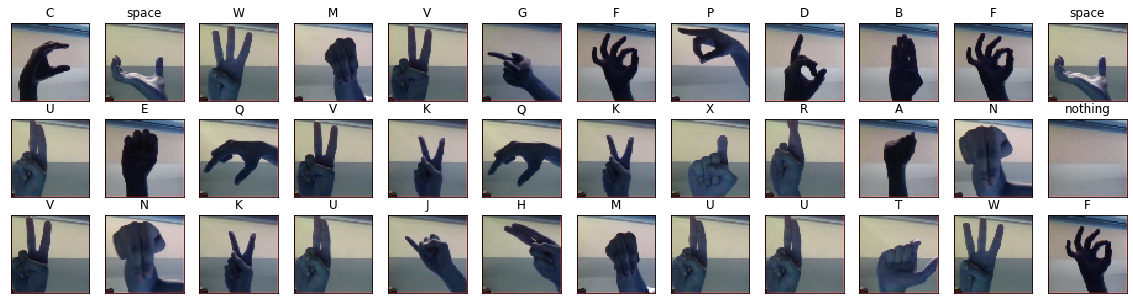

In [12]:
# Print the first several training images, along with the labels
labels = ['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']
fig = plt.figure(figsize=(20,5))

count = 0
while count < 36:
    rannum = randrange(400)
    ax = fig.add_subplot(3, 12, count + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train_origin[rannum]))
    ax.set_title("{}".format(labels[Y_train_origin[0, rannum]]))
    count = count + 1
plt.show()